# PCA Hands-on Notebook

This notebook follows the hands-on steps outlined in the uploaded PCA-handson slide deck and implements them step-by-step in Python:
- Load example dataset
- Scale the data
- Compute covariance matrix
- Compute eigenvalues & eigenvectors (eigen decomposition)
- Create (eigenvalue, eigenvector) pairs and sort
- Explained variance and scree (step) plot
- Map (project) original data to selected principal components (manual & sklearn)
- Use PCA-reduced data with a RandomForest classifier and compare results
- Visualize misclassified samples

(Notebook generated programmatically to capture all PCA steps.)

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

%matplotlib inline


In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data
y = iris.target

In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["Target_value"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target_value
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Load dataset (Iris) and create a DataFrame
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
sc = StandardScaler()
sc = sc.fit(X)
sc

StandardScaler()

In [ ]:
x_scaled = sc.transform(X)

In [ ]:
# Step 1: Scale (standardize) the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check mean ~0 and std ~1
print('Means (approx):', np.round(X_scaled.mean(axis=0), 4))
print('Stds  (approx):', np.round(X_scaled.std(axis=0), 4))


Means (approx): [-0. -0. -0. -0.]
Stds  (approx): [1. 1. 1. 1.]


In [ ]:
cov_mat = np.cov(X_scaled, rowvar=False)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
# Step 2: Covariance matrix of scaled data
# We use the unbiased estimator (rowvar=False)
cov_mat = np.cov(X_scaled, rowvar=False)
cov_mat_df = pd.DataFrame(cov_mat, index=feature_names, columns=feature_names)
cov_mat_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
# Step 3: Eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Eigenvalues and eigenvectors
eig_vals_rounded = np.round(eig_vals, 4)
eig_vecs_rounded = np.round(eig_vecs, 4)

print('Eigenvalues:\n', eig_vals_rounded)
print('\nEigenvectors (columns correspond to eigenvectors):\n', eig_vecs_rounded)


Eigenvalues:
 [2.9381 0.9202 0.1477 0.0209]

Eigenvectors (columns correspond to eigenvectors):
 [[ 0.5211 -0.3774 -0.7196  0.2613]
 [-0.2693 -0.9233  0.2444 -0.1235]
 [ 0.5804 -0.0245  0.1421 -0.8014]
 [ 0.5649 -0.0669  0.6343  0.5236]]


In [ ]:
# Pair eigenvalues with eigenvectors and sort by eigenvalue (descending)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs

[(np.float64(2.938085050199995),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9201649041624864),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.1477418210449475),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.020853862176462696),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [ ]:
list1 = ["Sahil", "Akash", "Tejaswi"]
for each in list1:
  print(each)

Sahil
Akash
Tejaswi


In [ ]:
for each in enumerate(list1):
  print(each)

(0, 'Sahil')
(1, 'Akash')
(2, 'Tejaswi')


In [ ]:
for key, value in enumerate(list1):
  print(f"PC{key}")
  print(value)

PC0
Sahil
PC1
Akash
PC2
Tejaswi


In [ ]:
eig_pairs

[(np.float64(2.938085050199995),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9201649041624864),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.1477418210449475),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.020853862176462696),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [ ]:
# Pair eigenvalues with eigenvectors and sort by eigenvalue (descending)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
# Sort by eigenvalue descending
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalue - Eigenvector pairs (sorted):')
for i, pair in enumerate(eig_pairs):
    print(f'PC{i+1}: Eigenvalue={pair[0]:.4f}')


Eigenvalue - Eigenvector pairs (sorted):
PC1: Eigenvalue=2.9381
PC2: Eigenvalue=0.9202
PC3: Eigenvalue=0.1477
PC4: Eigenvalue=0.0209


In [ ]:
Total_variance = 2.9381+0.9202+0.1477+0.0209
Total_variance

4.0269

In [ ]:
PC1 = 2.9381/Total_variance
PC1

0.7296183168193895

In [ ]:
PC2 = 0.9202/Total_variance
PC2

0.22851324840447987

In [ ]:
PC1+PC2

0.9581315652238693

### 95.81% of Data is explained by having 50% of Columns

In [ ]:
# Explained variance and cumulative explained variance
total = sum(eig_vals)
explained_variances = [(i / total) for i in sorted(eig_vals, reverse=True)]
explained_variances

[np.float64(0.7296244541329989),
 np.float64(0.22850761786701754),
 np.float64(0.03668921889282865),
 np.float64(0.005178709107154905)]

In [ ]:
np.cumsum(explained_variances)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [ ]:
# Explained variance and cumulative explained variance
total = sum(eig_vals)
explained_variances = [(i / total) for i in sorted(eig_vals, reverse=True)]
cum_explained = np.cumsum(explained_variances)

explained_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variances))],
    'Eigenvalue': sorted(eig_vals, reverse=True),
    'Explained Variance Ratio': np.round(explained_variances, 4),
    'Cumulative Explained': np.round(cum_explained, 4)
})
explained_df


,PC,Eigenvalue,Explained Variance Ratio,Cumulative Explained
0,PC1,2.938085,0.7296,0.7296
1,PC2,0.920165,0.2285,0.9581
2,PC3,0.147742,0.0367,0.9948
3,PC4,0.020854,0.0052,1.0000


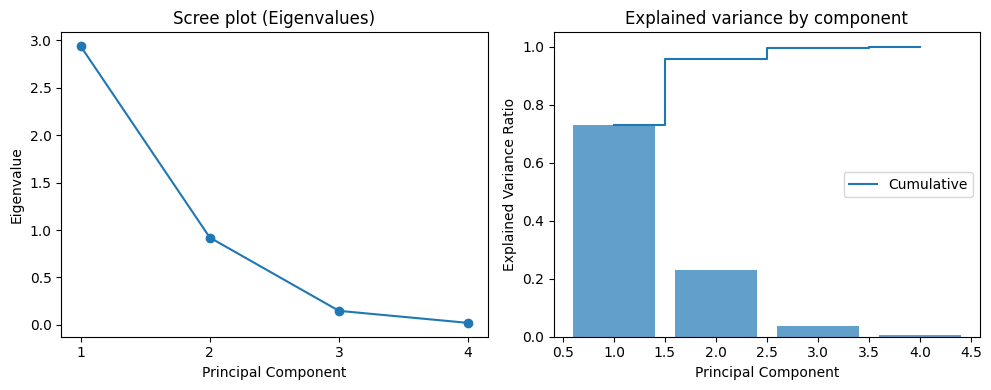

In [ ]:
# Scree plot (step plot of eigenvalues and explained variance)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(range(1, len(eig_vals)+1), sorted(eig_vals, reverse=True), marker='o')
plt.title('Scree plot (Eigenvalues)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eig_vals)+1))

plt.subplot(1,2,2)
plt.bar(range(1, len(explained_variances)+1), explained_variances, alpha=0.7, align='center')
plt.step(range(1, len(cum_explained)+1), cum_explained, where='mid', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance by component')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
eig_pairs[0][1]

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [ ]:
eig_pairs[1][1]

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

In [ ]:
W = np.column_stack((eig_pairs[0][1], eig_pairs[1][1]))
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [ ]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
# Project the scaled data
X_pca_manual = X_scaled.dot(W)
X_pca_manual

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

## ALTERNATE METHOD

#### Method 1

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
x_pca_2 = pca.fit_transform(X_scaled)

In [ ]:
x_pca_2

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

#### Method 2

In [ ]:
pca_new = PCA(n_components=.97) ## I need 95% of explained Data

In [ ]:
pca_data = pca_new.fit_transform(X_scaled)

In [ ]:
pca_data

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ],
       [-2.07563095,  1.48917752, -0.02696829],
       [-2.44402884,  0.0476442 , -0.3354704 ],
       [-2.23284716,  0.22314807,  0.0886955 ],
       [-2.33464048, -1.11532768, -0.14507686],
       [-2.18432817, -0.46901356,  0.25376557],
       [-2.1663101 ,  1.04369065,  0.2686811 ],
       [-2.32613087,  0.13307834, -0.09375924],
       [-2.2184509 , -0.72867617,  0.23091124],
       [-2.6331007 , -0.96150673, -0.18079608],
       [-2.1987406 ,  1.86005711,  0.472901  ],
       [-2.26221453,  2.68628449, -0.03052661],
       [-2.2075877 ,  1.48360936,  0.00534409],
       [-2.19034951,  0.48883832,  0.04421532],
       [-1.898572  ,  1.40501879,  0.37434327],
       [-2.34336905,  1.12784938, -0.13263047],
       [-1.914323  ,  0.40885571,  0.421

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
pca = pca.fit(X_scaled)

In [ ]:
variance = pca.explained_variance_

In [ ]:
variance

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
total_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
# Step 4: Manual mapping (projecting) onto top 2 principal components
# Build projection matrix from top 2 eigenvectors (already sorted in eig_pairs)
W = np.column_stack((eig_pairs[0][1], eig_pairs[1][1]))  # shape (n_features, 2)
# Project the scaled data
X_pca_manual = X_scaled.dot(W)

# Compare with sklearn PCA (n_components=2)
pca = PCA(n_components=2)
X_pca_sklearn = pca.fit_transform(X_scaled)

print('First 5 rows - Manual projection:')
print(np.round(X_pca_manual[:5, :], 4))
print('\nFirst 5 rows - sklearn PCA projection:')
print(np.round(X_pca_sklearn[:5, :], 4))

# Small check: PCA axes may differ by sign; check absolute correlation
corr = np.abs(np.corrcoef(X_pca_manual.T, X_pca_sklearn.T)[:2, 2:])
print('\nAbsolute correlation between manual PC scores and sklearn PC scores:')
print(np.round(corr, 4))


In [ ]:
# Scatter plot of the two principal components (colored by target)
plt.figure(figsize=(7,5))
for lab in np.unique(y):
    plt.scatter(X_pca_manual[y==lab, 0], X_pca_manual[y==lab, 1], label=iris.target_names[lab])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris projected onto top 2 principal components (manual)')
plt.legend()
plt.show()


In [ ]:
# Step 5: Fit RandomForest on original features vs PCA-reduced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_orig = rf.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

In [ ]:
acc_orig

0.8888888888888888

In [ ]:


# Using PCA reduced data (2 components)
X_pca_full = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_full, y, test_size=0.3, random_state=42, stratify=y)
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f'Accuracy on original features: {acc_orig:.4f}')
print(f'Accuracy on PCA-reduced (2 PCs): {acc_pca:.4f}')

print('\nClassification report (original features):\n', classification_report(y_test, y_pred_orig, target_names=iris.target_names))
print('\nClassification report (PCA 2 components):\n', classification_report(y_test_pca, y_pred_pca, target_names=iris.target_names))


Accuracy on original features: 0.8889
Accuracy on PCA-reduced (2 PCs): 0.8667

Classification report (original features):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Classification report (PCA 2 components):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.76      0.87      0.81        15
   virginica       0.85      0.73      0.79        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [ ]:
# Analyze misclassified samples (original-feature model)
cm = confusion_matrix(y_test, y_pred_orig)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix - RandomForest on original features')
plt.show()

# Show misclassified rows from test set
test_idx = np.arange(len(X_test))
mis_idx = test_idx[y_test != y_pred_orig]
if len(mis_idx) > 0:
    print('Misclassified samples (original feature model):')
    mis_samples = X_test[mis_idx]
    mis_true = y_test[mis_idx]
    mis_pred = y_pred_orig[mis_idx]
    display(pd.DataFrame(mis_samples, columns=feature_names).assign(true=lambda df: [iris.target_names[i] for i in mis_true], pred=lambda df: [iris.target_names[i] for i in mis_pred]))
else:
    print('No misclassified samples in test set for the original-feature RandomForest.')


# Conclusion & Notes

- We standardized the data, computed the covariance matrix, performed eigen decomposition and paired eigenvalues with eigenvectors.
- We calculated explained variance and visualized it (scree plot) to choose the number of components.
- We projected the data manually using the top eigenvectors and verified against sklearn's PCA.
- We trained RandomForest on original features and PCA-reduced features (2 PCs) and compared performance.
- For real datasets and production use, take care with scaling, retaining enough components for variance, and interpretability trade-offs.

You can re-run cells, change `n_components`, or replace `iris` with your dataset (for example, the dataset used in your course) to reproduce the same steps.

